## presenté par : Bradid yassmien otpion : IAA

# TP2:: Prétraitement


# <ins style='background :lightblue'>ETAPE 1:: Opération géométrique &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</ins> 

## <span style='background :lightgreen'>1-Function cutimage(x ; y ; t1 ; t2)//selection du premier pixel avec curseur &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>
pour cette fonction j'ai utiliser la biblio `CV2` qui permet de lire les image avec `cv2.imread` ensuite ```cv2.setMouseCallback() ``` permet d’afficher les positions x, y de chaque pixel de l’image lors d'un clique avec la souris appelé ```le pixel de depart``` .
le principe de de la fonction ```cutimg(x,y,T1,T2)``` c'est de prendre le point de depart et lui ajouter T1 de largeur et T2 de hauteur et enfin de les afficher et sauvegarder avec ```cv2.imwrite``` 

le pixel de depart( 1226  , 1184 )


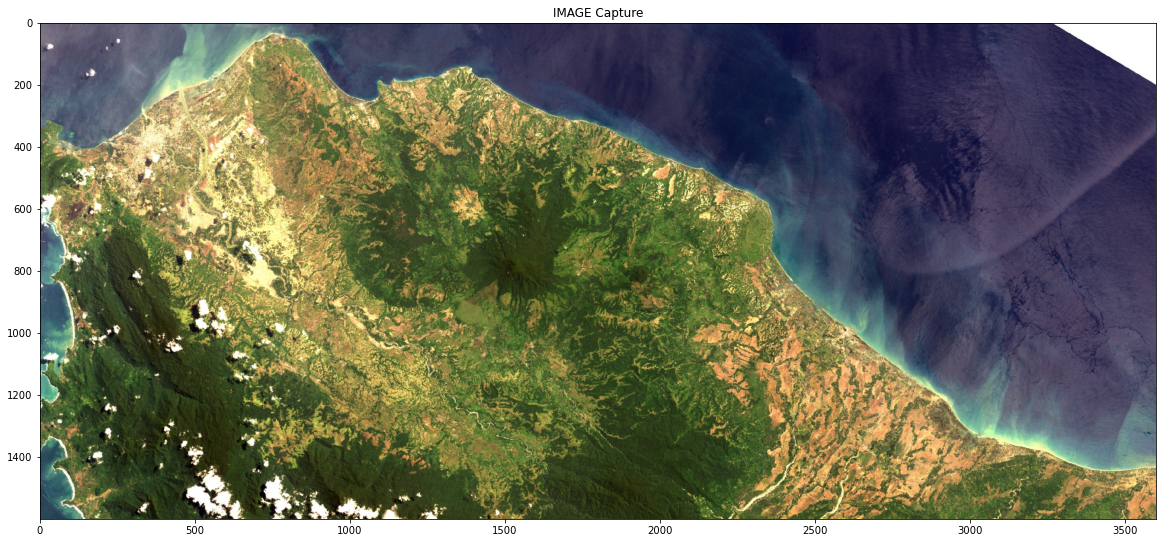

In [2]:
# importing the module 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image



def cutimg(x,y,T1,T2):
    # affichage des coordonnées
         # sur la fenêtre d'image
        cropped=img[x:T1,y:T2]
        #cv2.imshow('image', cropped) 
        cv2.imwrite('cropped.jpg', cropped)  #jpg
        
        #attendre qu'une touche soit enfoncée pour quitter
        #sauvegarde et affichage de l'image resultante capturé
        image = mpimg.imread("cropped.jpg")
        fig, axs = plt.subplots(figsize=(20, 15))
        axs.set_title('IMAGE Capture')
        plt.imshow(image)
        
    
# fonction pour afficher les coordonnées de
# des points cliqués sur l'image
def souris(event, x, y,flags, params): 
  
    # # vérification des clics gauche de la souris
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # affichage des coordonnées
        print('le pixel de depart(',x, ' ,', y,')') 
        cutimg(x,y,x+1600,y+3600)   # je choisis un rectangle 1600 hauteur et 3600 largeur
            # ferme la fenêtre
        cv2.destroyAllWindows() 

  
    #driver function 
if __name__=="__main__": 

   
    cv2.namedWindow("image", cv2.WINDOW_NORMAL)        # Créer une fenêtre avec une liberté de dimensions
    img = cv2.imread("Image.jpg")                        # lire image
    img = cv2.resize(img, (5760, 7200))                    # taille image a afficher
    cv2.imshow("image", img)                            #afficher image
        # setting mouse hadler for the image 
    # and calling the click_event() function 
    cv2.setMouseCallback('image', souris) 
    cv2.waitKey(0)                                      
    cv2.destroyAllWindows()                             


# <ins style='background:lightblue'>Etape 2 :: Compression &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</ins>


## <span style='background :lightgreen'>1- sauvegarde et affichage des image en differents format : png ,jpeg,gif , tiff &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>
pour cela j'ai utiliser la biblio ```Image``` pour pouvoir souvegarder l'image original (capturé) sous differents format

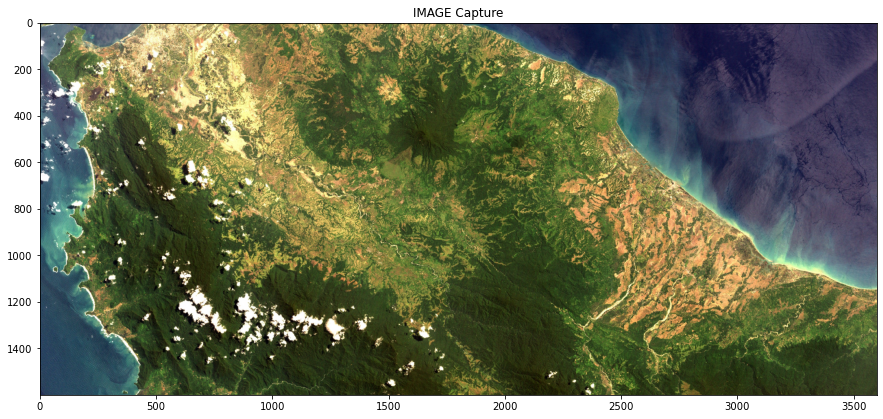

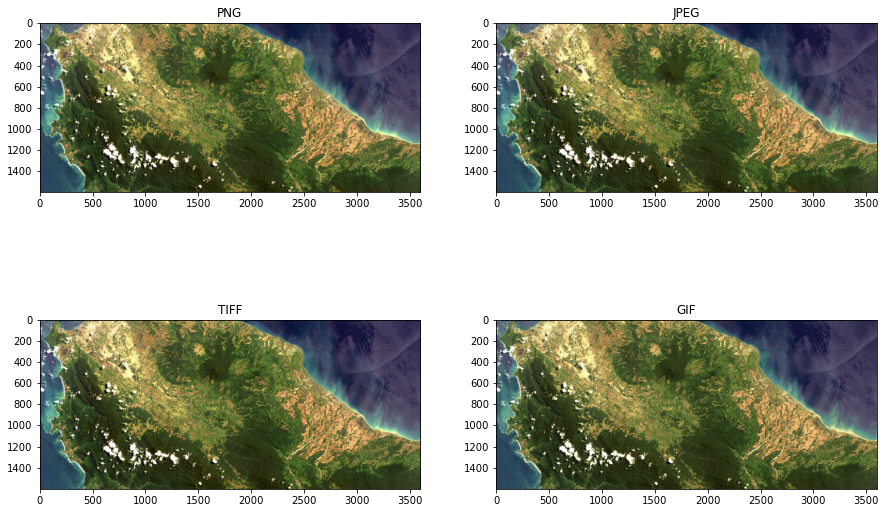

In [43]:
 #sauvegarder les images sous differents formats

cropped = Image.open("cropped.jpg") #image original
cropped.save('croppedpng.png') #png
cropped.save('croppedjpeg.jpeg') #jpeg
cropped.save('croppedtiff.tiff') #tiif
cropped.save("croppedgif.gif") #gif

#lire les images sou differents format
img0= mpimg.imread("cropped.jpg")
img1 = mpimg.imread("croppedpng.png")
img2 = mpimg.imread("croppedjpeg.jpeg")
img3 = mpimg.imread("croppedtiff.tiff")
img4 = mpimg.imread("croppedgif.gif")

fig, axs = plt.subplots(figsize=(15, 10))
axs.set_title('IMAGE Capture')
plt.imshow(img0)

fig, axarr = plt.subplots(2,2, figsize=(15 ,10))
axarr[0,0].set_title('PNG')
axarr[0,0].imshow(img1)
axarr[0,1].set_title('JPEG')
axarr[0,1].imshow(img2)
axarr[1,0].set_title('TIFF')
axarr[1,0].imshow(img3)
axarr[1,1].set_title('GIF')
axarr[1,1].imshow(img4)

## <span style='background :lightpink'> Observation :  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
- en verifiant les proprietés de chaque image la taille de jpeg: ```1MO```  ,l'image capturé : ```3MO``` , gif :``` 6MO```,  png: ```10MO``` , ; tiff : ```16MO``` 
- en qualité on remarque que la qualité de png est plus mauvaise que les autre



## <span style='background :lightgreen'>2- Création d’une fonction pour mesurer ces différences avec l’image originale en calculant l’erreur quadratique moyenne</span>
 l'erreur quadratique moyenne entre les deux images est la somme de la différence quadratique entre les deux images de meme dimension pour cela j'ai créer deux fonction :
 - une pour calculer l'erreur quadratique moyenne entre deux images```eqm(image1, image2)```
 - et l'autre pour calculer EQM entre deux images et la similitude stuctruelle  ```compare_image(image1, image2)```

In [44]:
import numpy as np
def eqm (imageA, imageB):
    # l'erreur quadratique moyenne entre les deux images est la
     # somme de la différence quadratique entre les deux images;
     # REMARQUE: les deux images doivent avoir la même dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # retourne le MSE, plus l'erreur est faible, plus "similaire"
     # les deux images sont
    return err
def compare_images(imageA, imageB, title):
    # calculer l'erreur quadratique moyenne et la similitude structurelle
     # index pour les images
    m = eqm(imageA, imageB)

    print(title," %.2f" % m)

In [45]:
original = mpimg.imread("cropped.jpg")
PNG = mpimg.imread("croppedpng.png")
JPEG = mpimg.imread("croppedjpeg.jpeg")
TIFF = mpimg.imread("croppedtiff.tiff")
GIF = mpimg.imread("croppedgif.gif")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
PNG = cv2.cvtColor(PNG, cv2.COLOR_BGR2GRAY)
JPEG = cv2.cvtColor(JPEG, cv2.COLOR_BGR2GRAY)
TIFF = cv2.cvtColor(TIFF, cv2.COLOR_BGR2GRAY)
GIF = cv2.cvtColor(GIF, cv2.COLOR_BGR2GRAY)

# compare the images
#compare_images(original, original, "Original vs.Original")
compare_images(original, PNG, "EQM Original et PNG :")
compare_images(original, JPEG, "EQM Original et JPEG :")
compare_images(original, TIFF, "EQM Original et TIFF :")
compare_images(original, GIF, "EQM Original et GIF :")

EQM Original et PNG :  9654.36
EQM Original et JPEG :  30.60
EQM Original et TIFF :  0.00
EQM Original et GIF :  9.79


## <span style='background :lightpink' >Observation :  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
- EQM entre original et PNG est a ```10205.05``` qui veut dire que y'a une grande difference entre ces2 images
- EQM entre original et JPEG est a ```29,35``` c'est une bonne ressemblence 
- EQM entre original et TIFF est a ```0```  ils se ressemble beaucoup 
- EQM entre original et GIF est a ```9,44``` ca veut qui sent presque identique 

-- plus c'est proche a zero plus c'est meilleur 



# <ins style='background :lightblue'>Etape 3 :: Rehaussement de contraste &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</ins>

## <span style='background :lightgreen'>1-Création d’une fonction qui effectuer une égalisation d’histogramme  des 3 canaux &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>
- d'abord j'ai fai sl'extractions des 3 canaux de l'image captué puis j'ai fais pour chaque canal une egalisation d'histogramme et la finj'ai concatainé les trois canal en une image.
- pour faire l'egalisation d'histogramme j'ai créer une fonction ```histegalisation(img)``` qui prends en paramatre l'image et retounre l'image egalisé .
-  esuite jai afficher les 3 histogrammes des troix canaux separé et les 3 image obtenus de cette egalisation 
- enfin j'ai afficher l'image concaténé 

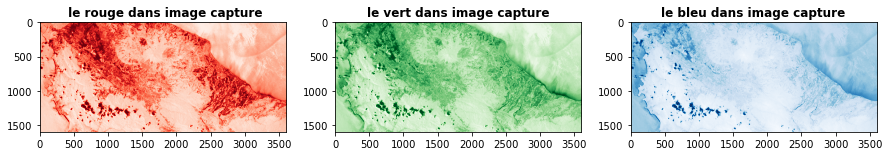

In [53]:
from rasterio.plot import show
import rasterio
#Lire une image en niveaux de gris
img = rasterio.open('C:/Users/dell/Documents/M2/ISAT/TP2/cropped.jpg')
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(15,7))
#faire voir la couleur rouge 
show((img , 1), ax=axr, cmap='Reds', title=' le rouge dans image capture')
#faire ressortir la couleur verte 
show((img, 2), ax=axg, cmap='Greens', title='le vert dans image capture')
#faire voir la couleur bleu 
show((img ,3), ax=axb, cmap='Blues', title='le bleu dans image capture')

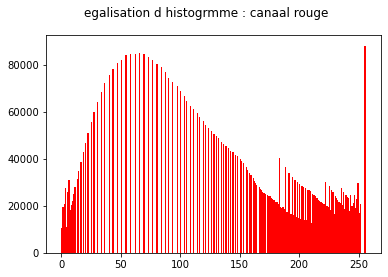

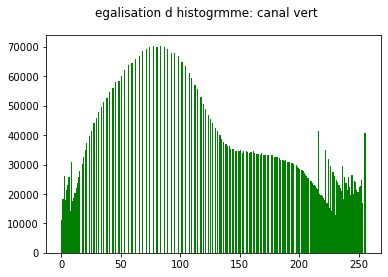

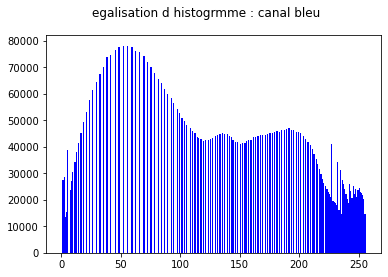

(-0.5, 3599.5, 1599.5, -0.5)

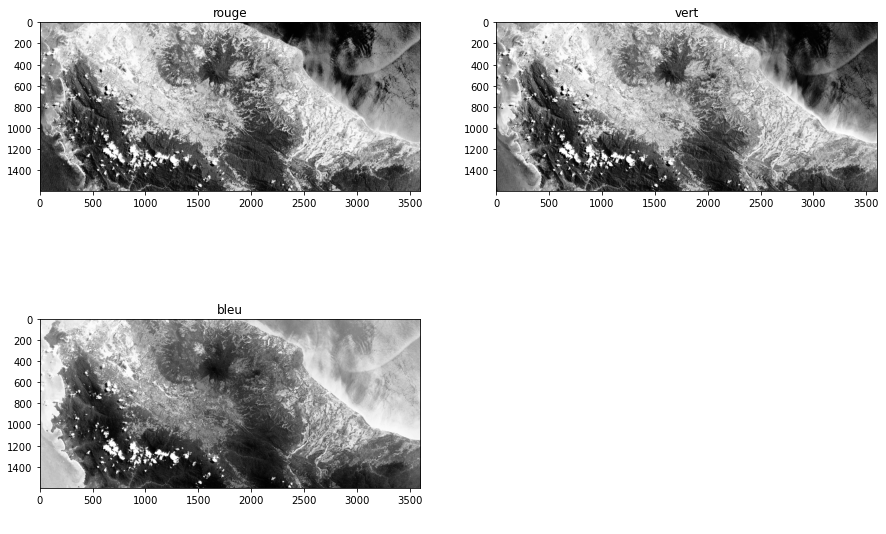

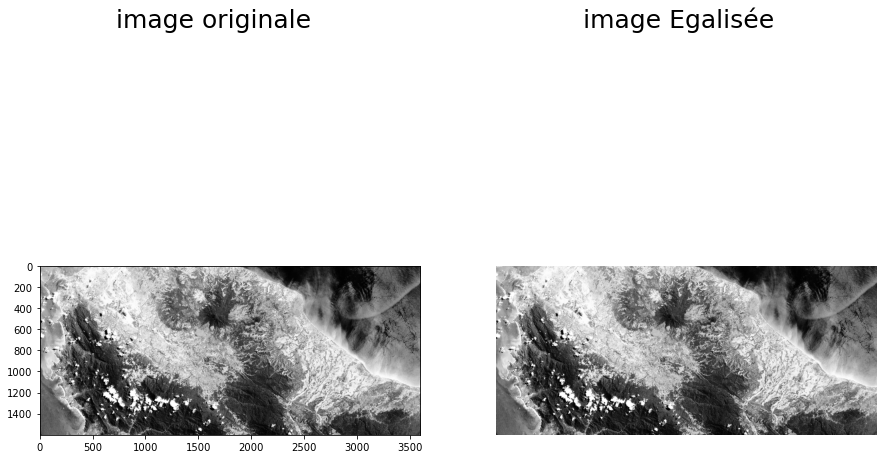

In [47]:
#Lire les valeurs de la grille dans des tableaux numpy 3 canaux 
red = img.read(1)  #lire couleur rouge de limage
green = img.read(2) #lire couleur vert
blue = img.read(3) #lire couleur bleu


def histegalisation(img):
    # Obtenir les valeurs de pixels de l'image
    pix = np.array(img)
    # Créer une nouvelle matrice pour l'image
    pix2 = np.copy(pix)
    # Obtenir des pixels uniques et la fréquence des valeurs de l'image
    ## La probabilité d'occurrence d'un pixel de niveau xk dans l'image
    rk, nk = np.unique(pix, return_counts=True)
    # Pixels d'image divisés par la taille de l'image
    #img.size nbr total de pixels 
    pk = nk/img.size   #px l'histogramme normalisé sur [0,1]
    pk_length = len(pk)
    # Obtenir la fréquence cumulée des valeurs de pixel uniques
    sk = np.cumsum(pk)
    # Multiplier la fréquence cumulée par la valeur maximale des pixels
    mul = sk*np.max(pix)
    # Obtenir la valeur arrondie des résultats multipliés
    roundVal = np.round(mul)
    # Cartographie des pixels pour l'égalisation
    for i in range(len(pix)):
        for j in range(len(pix[0])):
            pix2[i][j] = roundVal[np.where(rk == pix[i][j])]
      #retourner l'image égalisé      
    return pix2
            
# image egalisé r , g , b
pixR=histegalisation(red)
pixG=histegalisation(green)
pixB=histegalisation(blue)
# Tracer l'histogramme de l'image originale
img = cv2.imread('cropped.jpg',0)
plt.suptitle('egalisation d histogrmme : canaal rouge ')
#plt.hist(img.ravel(), 256, [0,256]) imge orginiale
#Tracer l'histogramme de la nouvelle image
plt.hist(pixR.ravel(), 256, [0,256],color = "red")
plt.show()

plt.suptitle('egalisation d histogrmme: canal vert ')
#plt.hist(img.ravel(), 256, [0,256])
#Tracer l'histogramme de la nouvelle image
plt.hist(pixG.ravel(), 256, [0,256],color = "green")
plt.show()

plt.suptitle('egalisation d histogrmme : canal bleu ')
#plt.hist(img.ravel(), 256, [0,256])
#Tracer l'histogramme de la nouvelle image
plt.hist(pixB.ravel(), 256, [0,256],color = "blue")
plt.show()


# Afficher la nouvelle image des 3 trois canaux
#rouge
fig, axarr = plt.subplots(2,2, figsize=(15 ,10))
axarr[0,0].set_title('rouge')
axarr[0,0].imshow(pixR,cmap='gray')
axarr[0,1].set_title('vert')
axarr[0,1].imshow(pixG,cmap='gray')
axarr[1,0].set_title('bleu')
axarr[1,0].imshow(pixB,cmap='gray')
plt.axis("off")


#3 canaux en une image
res=histegalisation(img)
fig, axs = plt.subplots(1,2,figsize=(15, 10))
axs[0].imshow(res,cmap='gray')
axs[1].imshow(res,cmap='gray')
plt.suptitle('image originale                                  image Egalisée',fontsize=25)
plt.axis("off")


## <span style='background :lightgreen'>2-proposition d'égalisation d’histogramme au cas d’une image couleur               &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</span>

il s'agit d'une image colorée (RVB), nous pouvons séparer les trois flux différents - rouge, vert, bleu; appelez cv2.equalizeHist () individuellement sur ces canaux et enfin fusionner.

Text(0.5, 0.98, ' image originale VS image egalisée ')

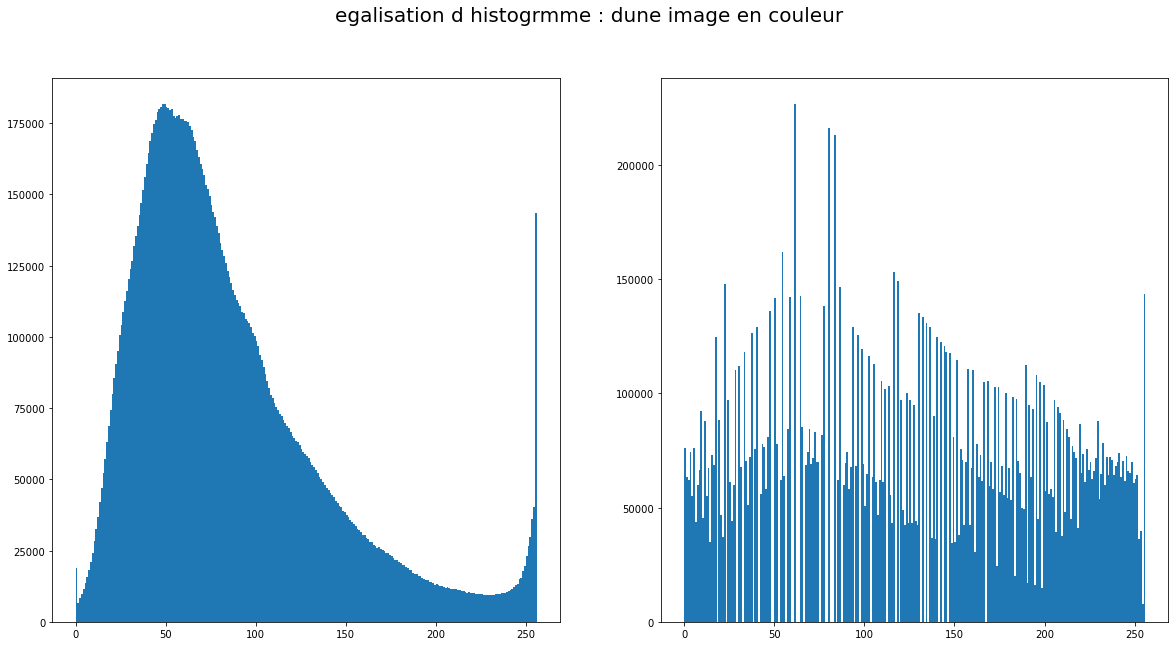

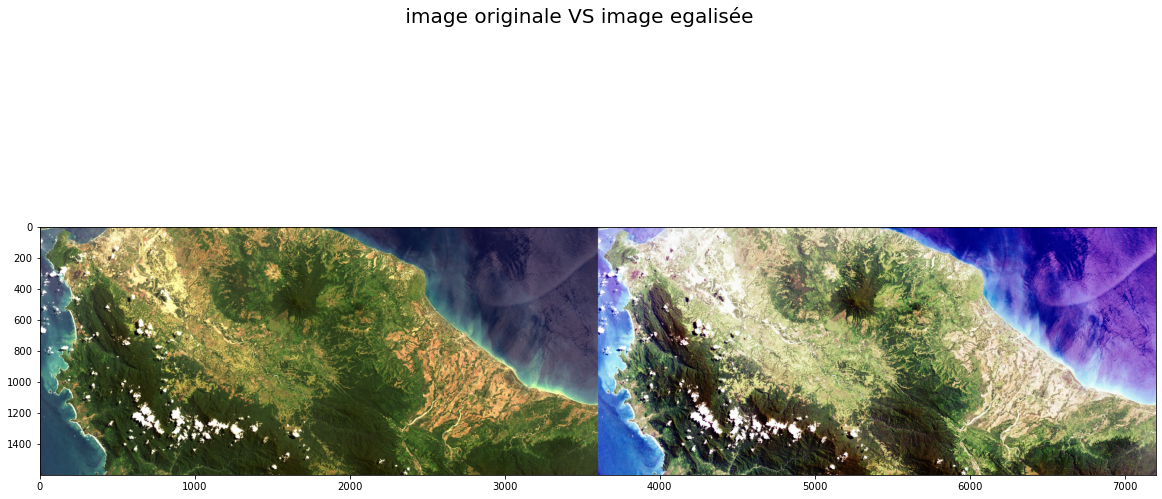

In [48]:
def histogram_equalization(img_in):
#séparer les flux de couleur
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculer fonction de distribution cumulative   
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# masque tous les pixels avec une valeur = 0 et remplacez-le par la moyenne des valeurs de pixel 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# fusionner les images dans les trois canaux
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    
    return img_out


img = mpimg.imread('cropped.jpg',0)
imgeg=histogram_equalization(img)

fig, axs = plt.subplots(1,2,figsize=(20, 10))
plt.suptitle('egalisation d histogrmme : dune image en couleur ',fontsize=20)
axs[0].hist(img.ravel(), 256, [0,256])
axs[1].hist(imgeg.ravel(), 256, [0,256])
fig, axs = plt.subplots(figsize=(20, 10))
res = np.hstack((img,imgeg)) 
plt.imshow(res)
plt.suptitle(' image originale VS image egalisée ', fontsize=20)



## <span style='background :lightpink'>observation :&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>
- Le résultat était très intéressant car l'image est  beaucoup plus clair et nette  que l'image d'origine, et l'histogramme du résultat était plus plat que l'histogramme de l'image d'origine, montrant une meilleure répartition des valeurs d'intensité des pixels sur l'image. 
- la vegeation en vertfoncé , les zones rocheuse en  jaune et la mer en bleu et plus ca c'approfondi plus ca devient foncé 

# <ins style='background :lightblue'>Etape 4 :: Reduction du bruit &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</ins>

## <span style='background :lightgreen' >1 - Filtres linéaires &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>

## <span style='background :LightSalmon'> a- MOYENNEUR &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>

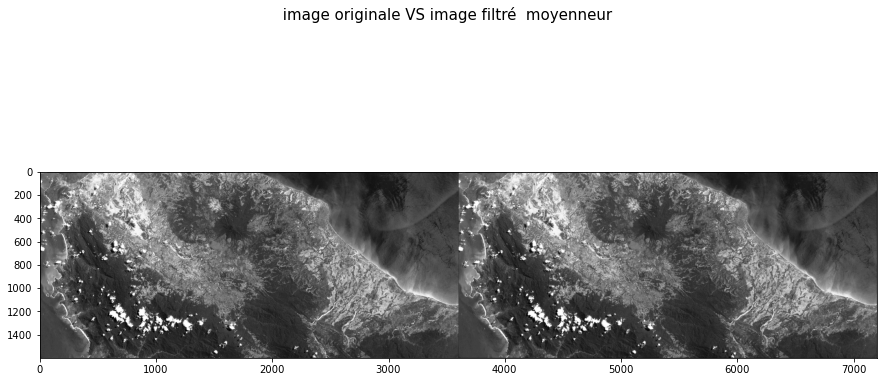

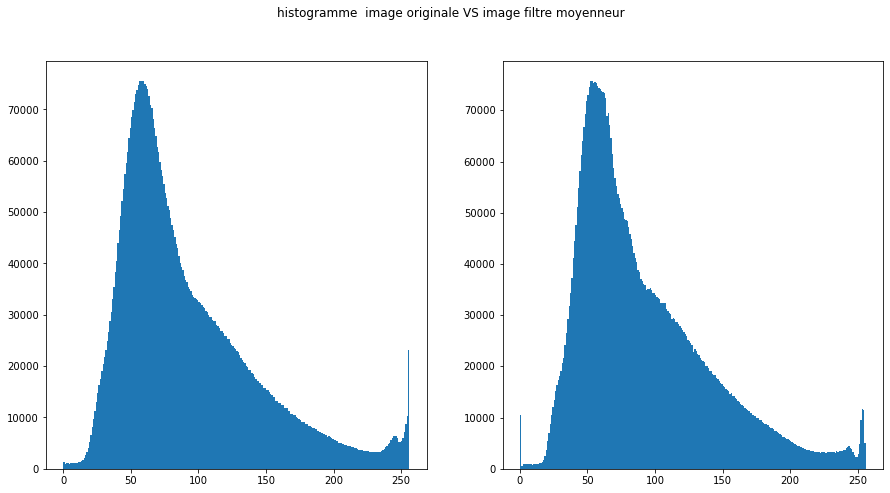

In [49]:
# Filtrage de domaine spatial passe-bas
#lire image
img = cv2.imread('cropped.jpg', 0) 
  
# Obtenir le nombre de lignes et de colonnes
# de l'image
def moyenneur (img):
    m, n = img.shape 
   
    # Développer un masque de filtre de moyenne (3, 3)
    mask = np.ones([3, 3], dtype = int) 
    mask = mask / 9
   
    # Convolutionnez le masque 3X3 sur l'image
    img_new = np.zeros([m, n]) 
  
    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
            img_new[i, j]= temp 
          
    img_new = img_new.astype(np.uint8) 
    cv2.imwrite('moyenneur.jpg', img_new) 
    return img_new

# Displaying the new image next tp the old one 
fig, axs = plt.subplots(figsize=(15, 7.5))
img_new=moyenneur(img)
res = np.hstack((img,img_new)) 
plt.imshow(res , cmap='gray')
plt.suptitle(' image originale VS image filtré  moyenneur', fontsize=15)


# Plotting the histogram of the original image
#histegalisation(img_new)
fig, ax = plt.subplots(1,2,figsize=(15, 7.5))
plt.suptitle('histogramme  image originale VS image filtre moyenneur')
# Plotting the histogram of new image
ax[0].hist(img.ravel(), 256, [0,256]) #pix2 , if we wanna see the result with equalization hist
ax[1].hist(img_new.ravel(), 256, [0,256]) #pix2 , if we wanna see the result with equalization hist
plt.show()

## <span style='background :LightSalmon'>b- Gaussian &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>

- Définition de la fonction de convolution qui itère sur l'image en fonction de la taille du noyau (filtre gaussien)., l'ancienne image avec la matrice comme noyau calculant la valeur de tous les neuf pixels et insérant dans le pixel central.
- Définition de la fonction gaussienne en fonction de la taille de sigma (écart type).

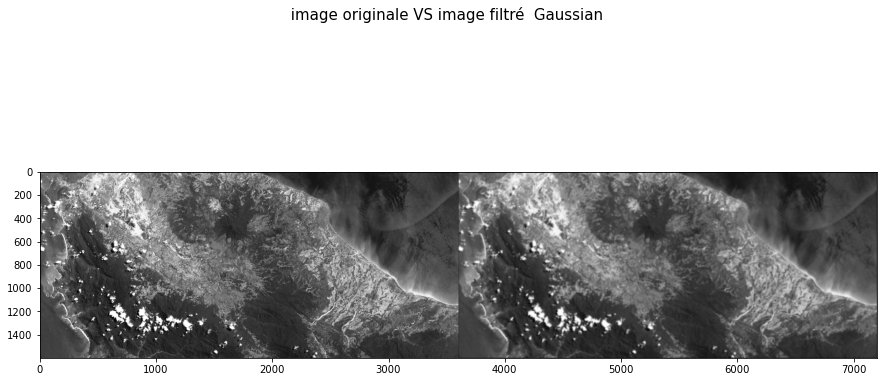

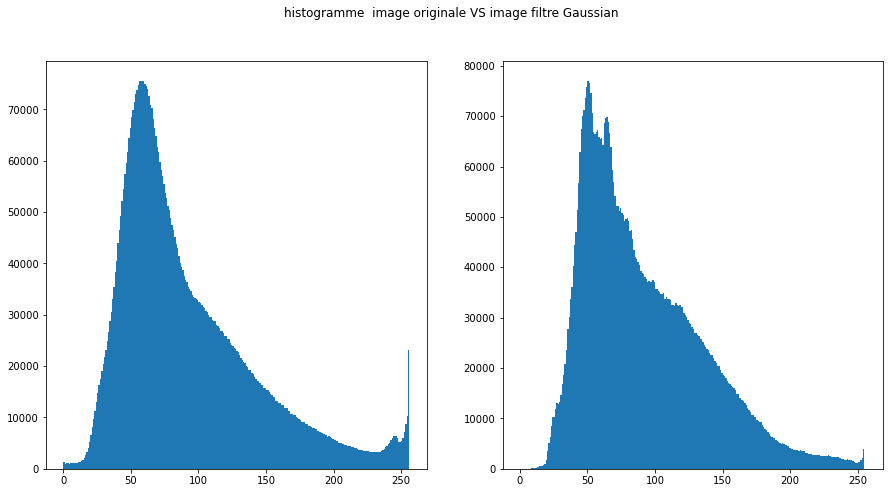

In [50]:
def convolution(oldimage, kernel):
    
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    

    return image_conv[h:h_end,w:w_end]



def Gaussian(image, sigma):
    image = np.asarray(image)
    #print(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    #for c in range(3):
    im_filtered= convolution(image, gaussian_filter)
    
    
    return (im_filtered.astype(np.uint8))

# Displaying the new image next tp the old one 
#img = Image.open('cropped.jpg')
img = cv2.imread('cropped.jpg', 0)
fig, axs = plt.subplots(figsize=(15, 7.5))
img_new=Gaussian(img,4)
cv2.imwrite('Gaussian.jpg', img_new) 
res = np.hstack((img,img_new)) 
plt.imshow(res , cmap='gray')
plt.suptitle(' image originale VS image filtré  Gaussian', fontsize=15)


# Plotting the histogram of the original image
#histegalisation(img_new)
fig, ax = plt.subplots(1,2,figsize=(15, 7.5))
plt.suptitle('histogramme  image originale VS image filtre Gaussian')
# Plotting the histogram of new image
ax[0].hist(img.ravel(), 256, [0,256]) #pix2 , if we wanna see the result with equalization hist
ax[1].hist(img_new.ravel(), 256, [0,256]) #pix2 , if we wanna see the result with equalization hist
plt.show()

## <span style='background :Lightgreen'>2- Filtres Non linéaires &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>

## <span style='background :LightSalmon'>a- Median &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;</span>

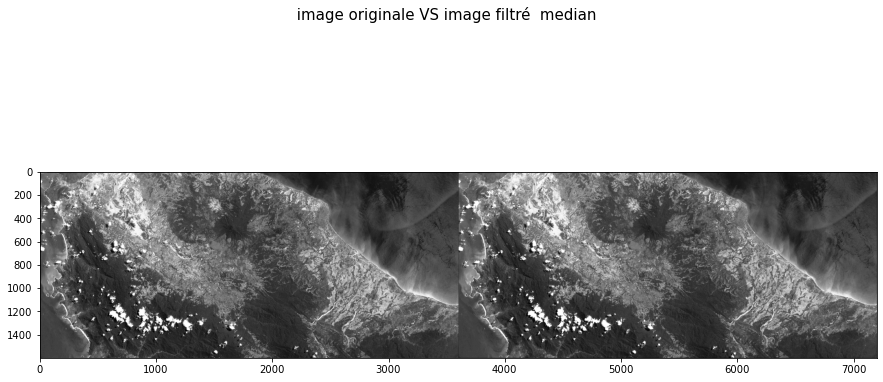

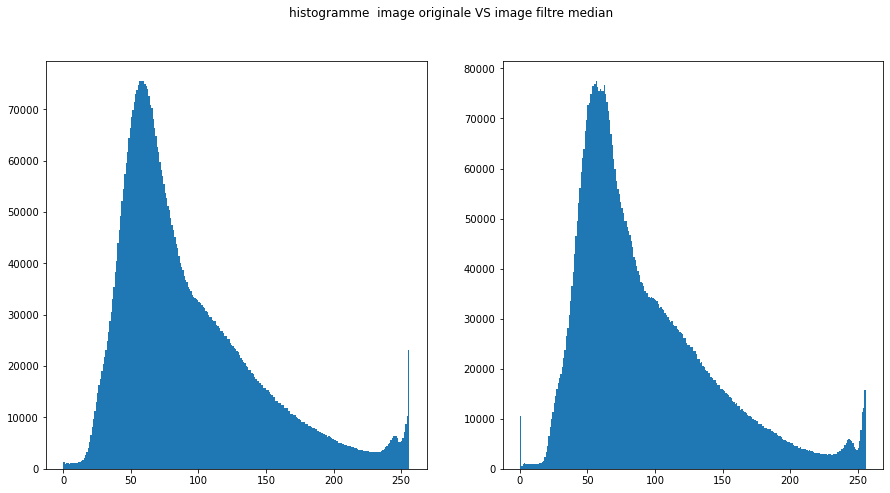

In [51]:
# Filtrage de domaine spatial médian
# lireimage 
img_noisy1 = cv2.imread('cropped.jpg', 0) 
def median (img):
    # Obtenir le nombre de lignes et de colonnes
    # de l'image
    m, n = img_noisy1.shape 
   
    # Traversez l'image. Pour chaque zone 3X3,
    # trouver la médiane des pixels et
    # remplacer le pixel ceter par la médiane
    img_new1 = np.zeros([m, n]) 
  
    for i in range(1, m-1): 
        for j in range(1, n-1): 
            temp = [img_noisy1[i-1, j-1], 
                   img_noisy1[i-1, j], 
                   img_noisy1[i-1, j + 1], 
                   img_noisy1[i, j-1], 
                   img_noisy1[i, j], 
                   img_noisy1[i, j + 1], 
                   img_noisy1[i + 1, j-1], 
                   img_noisy1[i + 1, j], 
                   img_noisy1[i + 1, j + 1]] 
          
            temp = sorted(temp) 
            img_new1[i, j]= temp[4] 
    img_new1 = img_new1.astype(np.uint8) 
    cv2.imwrite('median.jpg', img_new1) 
    return img_new1
# Displaying the new image next tp the old one 
fig, axs = plt.subplots(figsize=(15, 7.5))
img_new1=median(img_noisy1)
res = np.hstack((img,img_new1)) 
plt.imshow(res , cmap='gray')
plt.suptitle(' image originale VS image filtré  median', fontsize=15)

# Plotting the histogram of the original image
#histegalisation(img_new)
fig, ax = plt.subplots(1,2,figsize=(15, 7.5))
plt.suptitle('histogramme  image originale VS image filtre median')
# Plotting the histogram of new image
ax[0].hist(img.ravel(), 256, [0,256]) #pix2 , if we wanna see the result with equalization hist
ax[1].hist(img_new1.ravel(), 256, [0,256]) #pix2 , if we wanna see the result with equalization hist

plt.show()

## <span style='background :Lightgreen'>2- Mesurer l’amélioration en calculant l’erreur quadratique moyenne entre l’image originale et l’image filtrée </span>

In [52]:
ORIGINAL = mpimg.imread("cropped.jpg")
MOYENNEUR= mpimg.imread("moyenneur.jpg")
MEDIAN = mpimg.imread("median.jpg")
GAUSSIAN= mpimg.imread("Gaussian.jpg")

# convert the images to grayscale
ORIGINAL = cv2.cvtColor(ORIGINAL, cv2.COLOR_BGR2GRAY)
# compare the images
compare_images(ORIGINAL, MOYENNEUR, "Original et MOYENNEUR")
compare_images(ORIGINAL, MEDIAN, "Original et  MEDIAN")
compare_images(ORIGINAL, GAUSSIAN, "Original et GAUSSIAN")


Original et MOYENNEUR  181.35
Original et  MEDIAN  175.44
Original et GAUSSIAN  405.60


Observation : le filte median est meilleur 